
#  BoomBikes Bike Sharing Case Study
[Reference Data](http://dx.doi.org/10.1007/s13748-013-0040-3)

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Objective: To interpret factors inluencing the bikes sharing demand

### Project By:
- <b>Smita Behera</b>















## Step 1: Reading and Understanding the Data

In [1]:
#Import generic libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#notebook setting to display all the rowns and columns to have better clearity on the data.

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [3]:
#Read the file and assign to variable bShare
bShare= pd.read_csv('day.csv')
bShare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Undestanding the data - numerical values
bShare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### *** Above data shows, we have number of categorical values (as was indicated by data dictionary) but are available as numeric value ***

In [5]:
#Data information
bShare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


####  ***The above data shows we do not need to deal with null values ***

In [6]:
## From initial look at data it looks casual +registered is equalt to cnt. Checking the same
if ((bShare['casual']+bShare['registered']==bShare['cnt']).nunique()==1 & (bShare['casual']+bShare['registered']==bShare['cnt']).unique()==True) :
  print('registered + casual = cnt')  


registered + casual = cnt


#### *** Based on above information, dropping some of the columns*** 

In [7]:
#Based on above dropping causal and registered and using cnt as the dependent variable
bShare.drop(['casual','registered'], axis=1, inplace=True)

# Dropping instant as it's just an index
# Dropping dteday as month and years are already available as separate columns

bShare.drop(['instant','dteday'], axis=1, inplace=True)

## Step2: Data Visualisation

###  Explore non-categorical data 

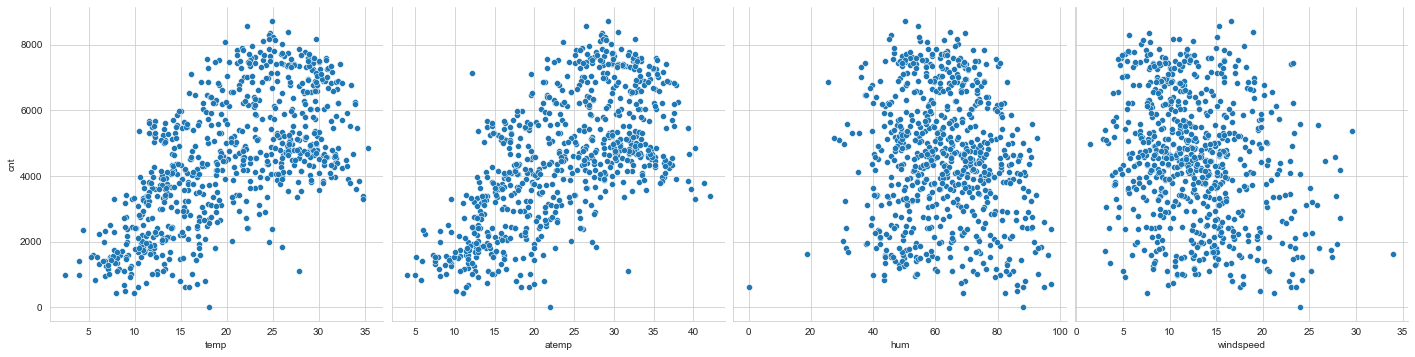

In [8]:
# Plotting for the non categorcal columns based on data dictionary
sns.set_style("whitegrid")
sns.pairplot(data=bShare,x_vars=['temp','atemp','hum','windspeed'], y_vars='cnt',height=5,aspect=1)


## The following are the observations:
1. Graphs for temp and atemp are very similar
2. Both temp and atemp have positive co-orelation with cnt and look very colinear that can lead to multicolinearity issue(Dropping atemp as temp will be a more accurate figure)
3. Highest demand of bikes is at humidity of 40 and 60
4. Highest demand for bikes is when windspeed is between 5 and 20
5. Several outliers are detected (dropping the most deviating ones)

In [9]:
# Dropping atemp as atemp and temp are very similar
bShare.drop(['atemp'], axis=1, inplace=True)

#Dropping outliers a few outliers for temp

# outliers in atemp
#bShare = bShare.drop(index = bShare[(bShare['temp'] > 25) & (bShare['temp'] < 30) & (bShare['cnt'] < 2000)].index)
#bShare = bShare.drop(index = bShare[(bShare['temp'] > 15) & (bShare['temp'] < 20) & (bShare['cnt'] < 100)].index)

#Dropping outliers a few outliers for hum
#bShare = bShare.drop(index = bShare[(bShare['hum'] < 20)].index)

#Dropping outliers a few outliers for windspeed
#bShare = bShare.drop(index = bShare[(bShare['windspeed'] > 30)].index)

In [10]:
bShare.shape

(730, 11)

#### *** Five drows were dropped***

### Improving readability of data, so that we get proper column names 

In [11]:
# Replacing numbers with labels 
bShare['season'] = bShare['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'})
bShare['mnth'] = bShare['mnth'].replace({1 : 'jan',2 :'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bShare['weekday'] = bShare['weekday'].replace({5:'Sunday',6:'Monday',0:'Tuesday',1:'Wednesday',2:'Thursday',3:'Friday',4:'Saturday'})
bShare['weathersit'] = bShare['weathersit'].replace({1:'clear',2 : 'cloudy',3 : 'light snow_rain'})

bShare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,Monday,0,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,Tuesday,0,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,Wednesday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,Thursday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,Friday,1,clear,9.305237,43.6957,12.522300,1600


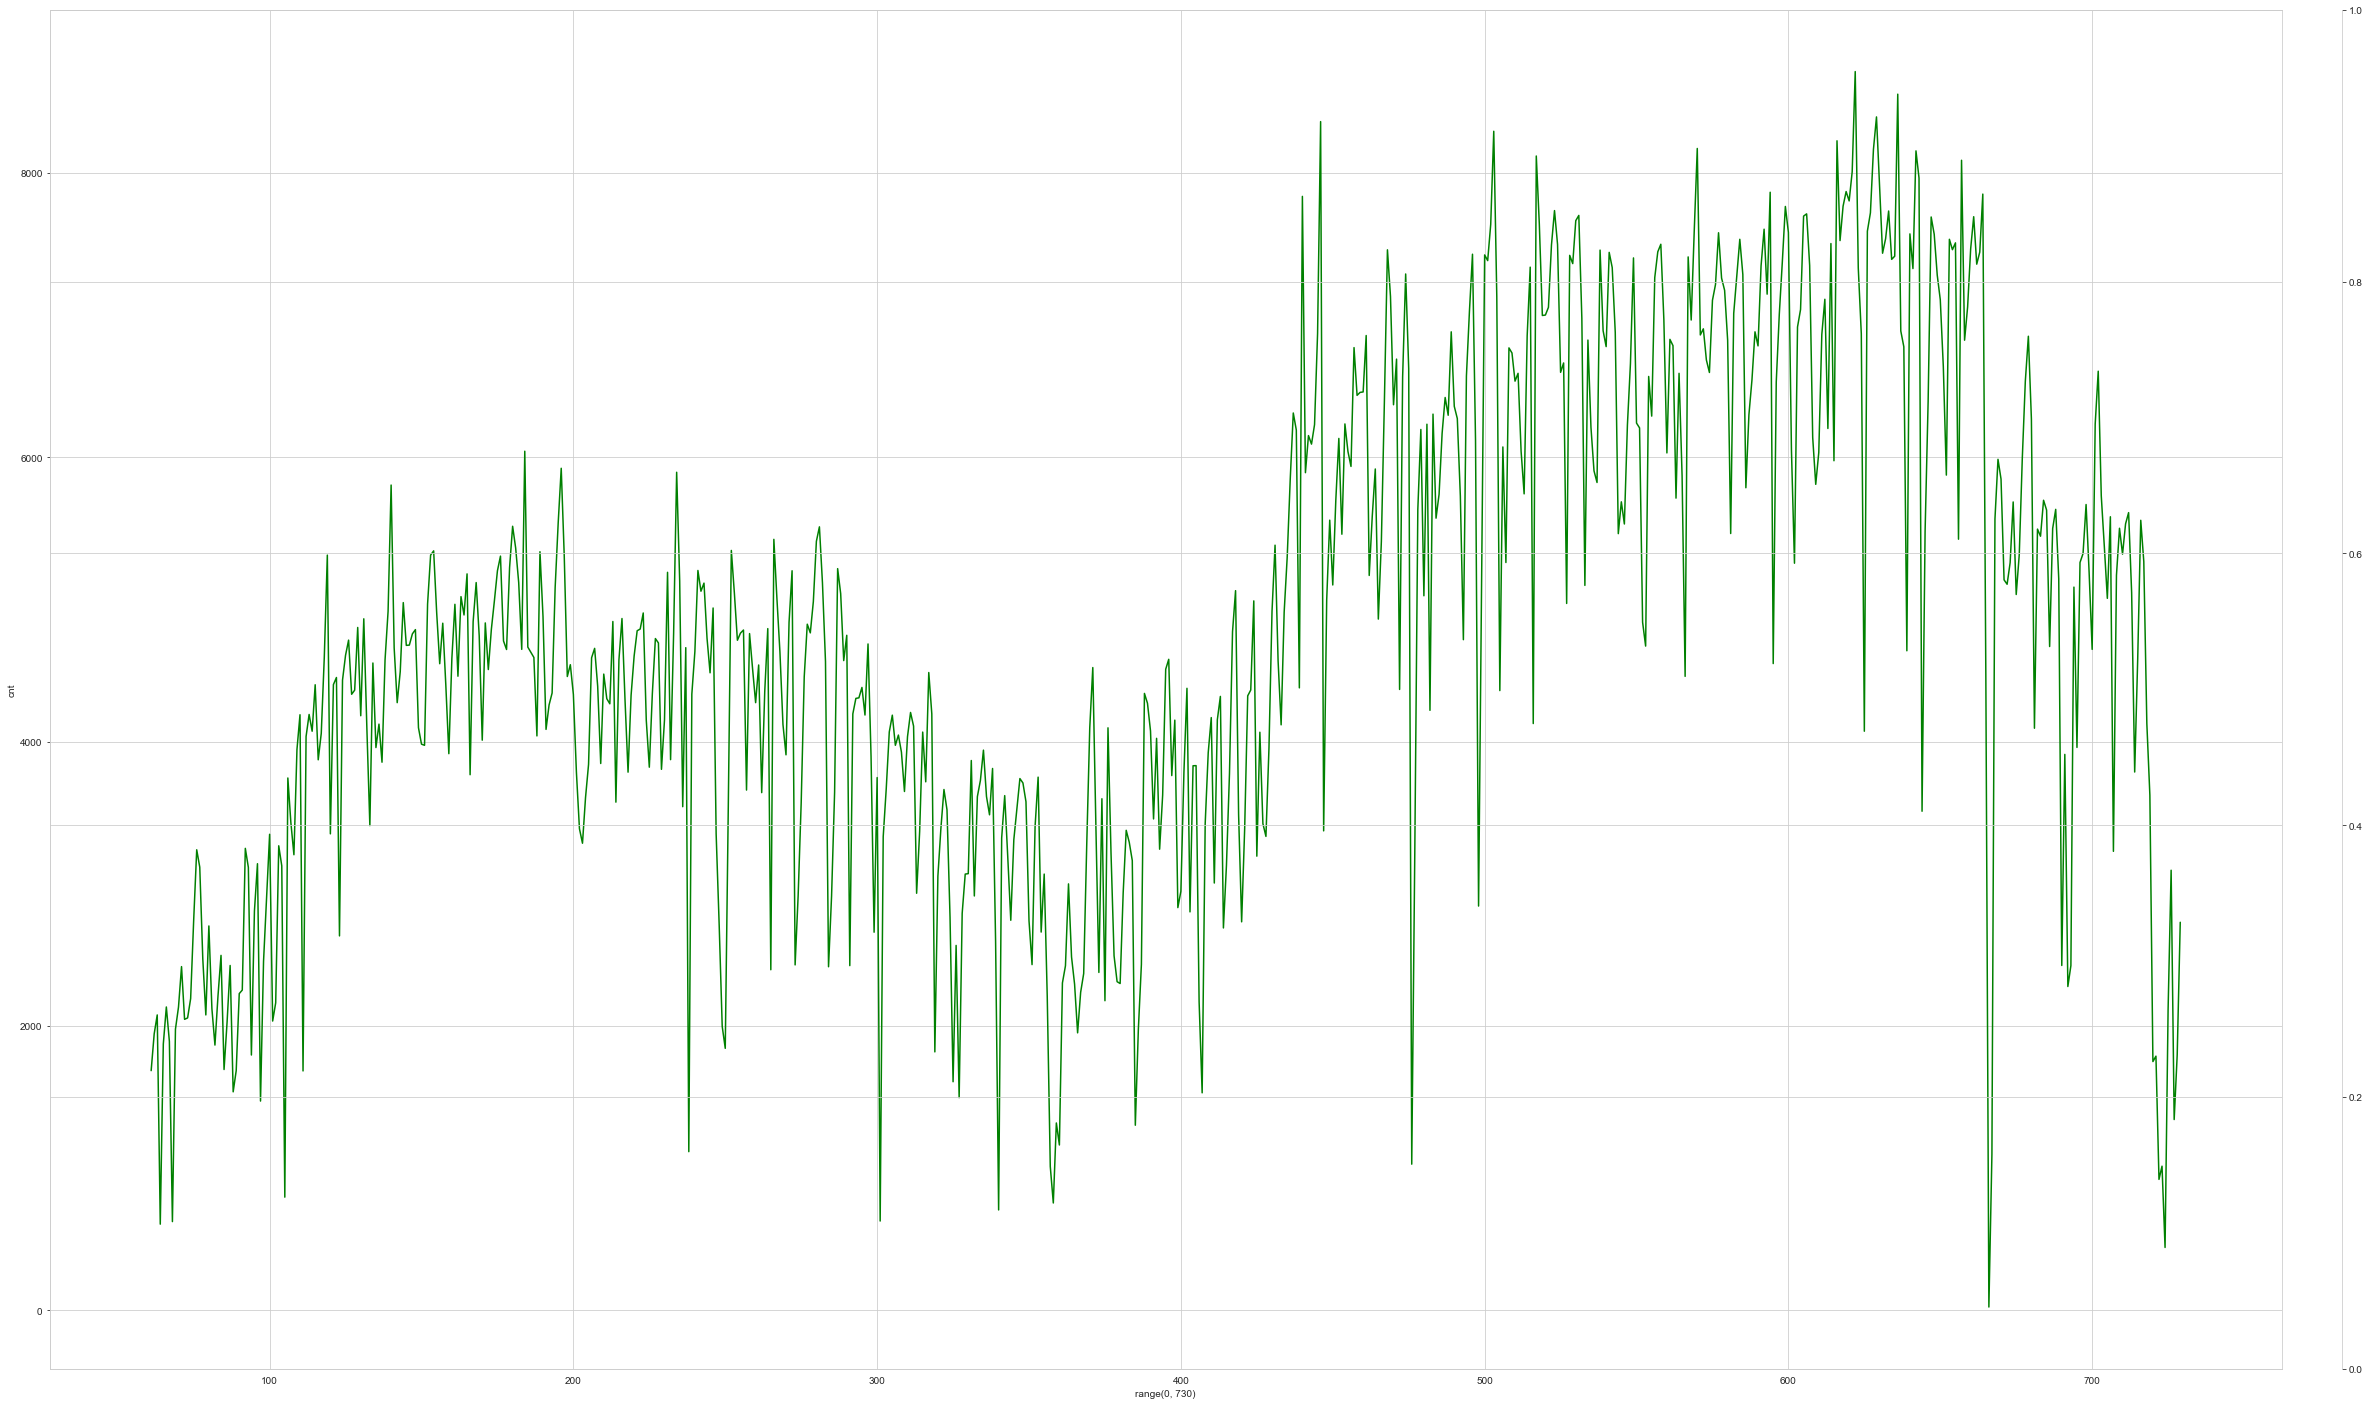

In [12]:
##Plotting line on cnt to understand the trend

fig = plt.figure(figsize=(40, 25))
host = fig.add_subplot(111)

par1 = host.twinx()

host.set_xlabel(range(bShare.shape[0]))
host.set_ylabel("cnt")


ab=bShare[bShare.index.to_series()>60]
p1 = host.plot(ab.index,ab.cnt, color='green',label="cnt")

# right, left, top, bottom
par1.spines['right'].set_position(('outward', 60))      

#### *** The count of bike rentals is not constant annd has periodic pattern of dips which will need to be analyzed ***

### Understanding distibution of the categorical data

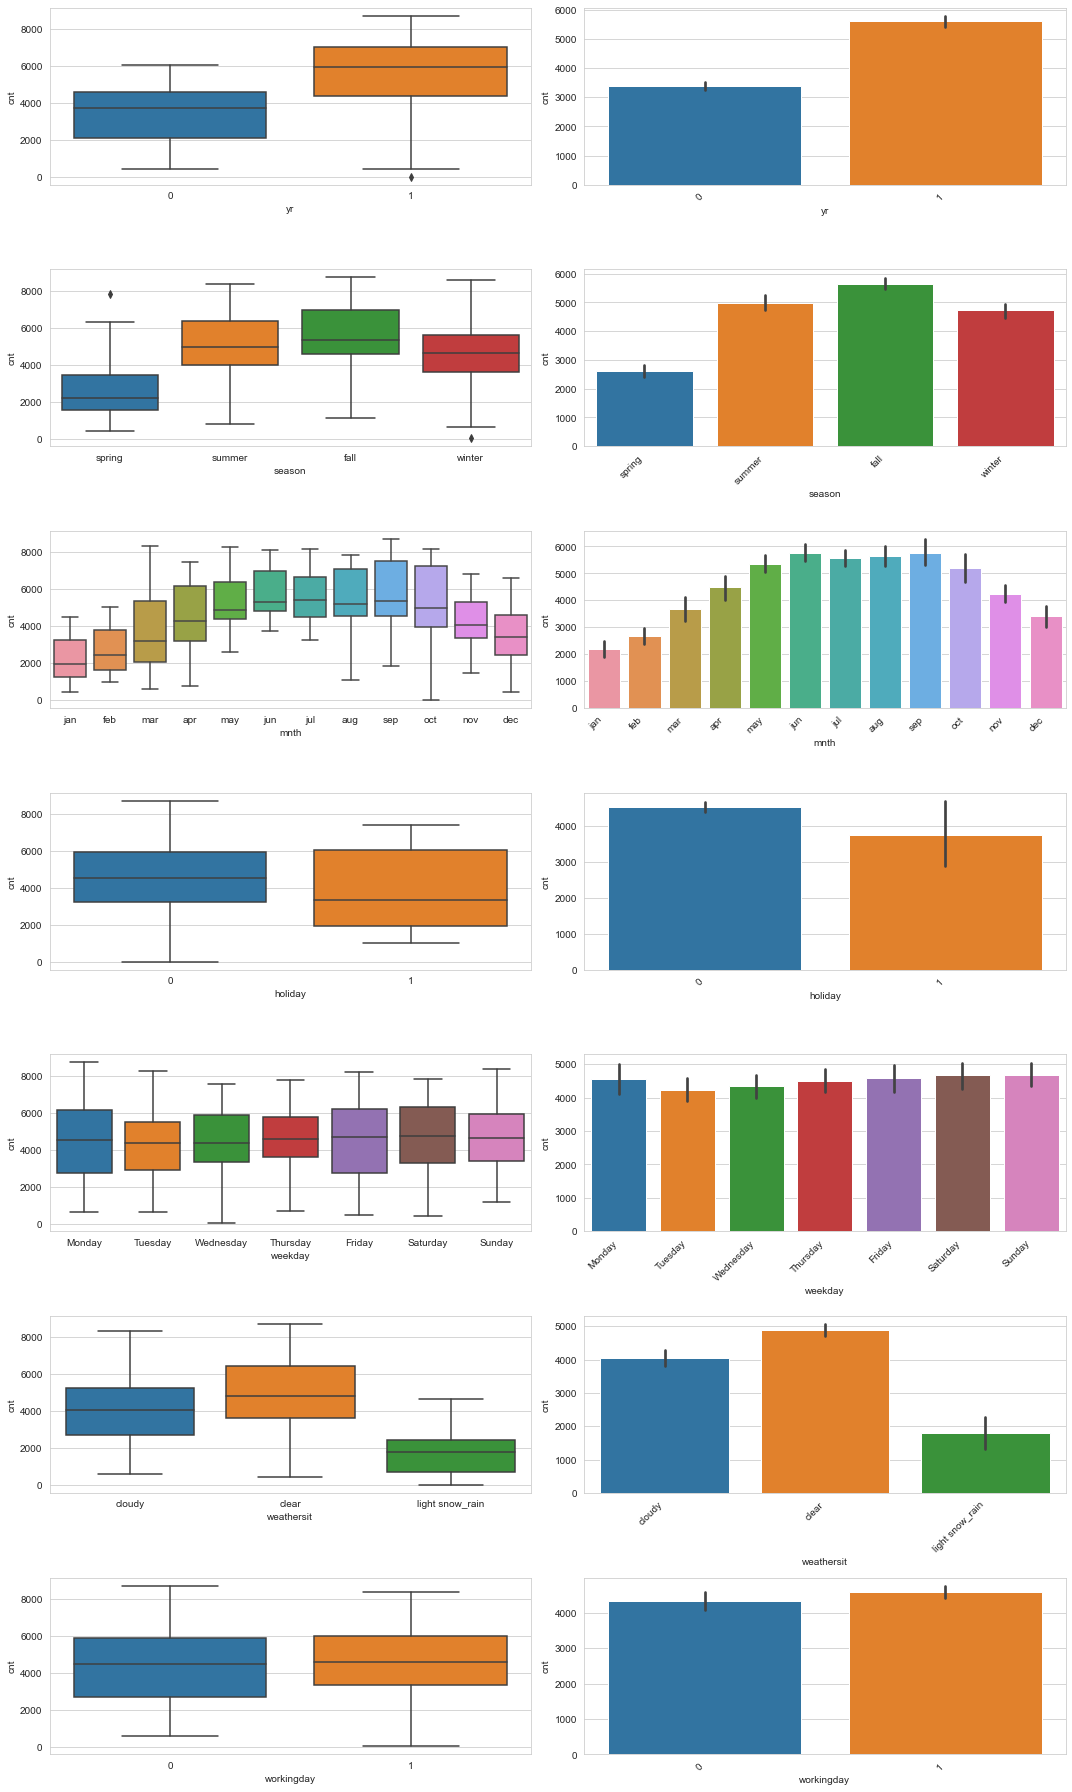

In [13]:
cols,rows = 2,7
num_cols = ['yr','season','mnth','holiday','weekday','weathersit','workingday']
fig = plt.figure() #figsize=(cols*4, rows*4))
fig.set_figheight(25)
fig.set_figwidth(15)
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,(i+1)*2-1)
    sns.boxplot(x=num_cols[i],y='cnt',data=bShare)
    ax=fig.add_subplot(rows, cols, (i+1)*2)
    sns.barplot(x=num_cols[i],y='cnt',data=bShare)
    plt.xticks(rotation=45, ha='right')
fig.tight_layout()  
plt.show()


## Following are the observations from above boxplots:
- Year 2019 looks much more profitable may be because boomBikes gained popularity
- Business blooms in Fall while not so much in Spring 
- Season and Month are somehow correlated as can be seen via the plots(creating season barplot with month hue)
- Looking at count and median of holiday, rentals are better on non holidays.
- Business dips on Thursday
- Clear skies is good for business and goes cold in snow
- workingday does not seem to have much impact on business
- Detected outlier for spring


#### **** Co-relation between various columns left in data ***

<AxesSubplot:>

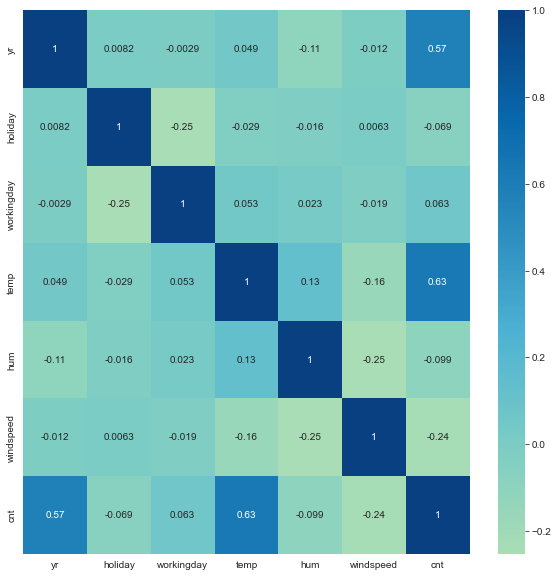

In [14]:
# correlation among variables
plt.figure(figsize=[10,10])
sns.heatmap(bShare.corr(),cmap='GnBu',center=0,annot=True)

#### *** From above we can see temperature and year have highest corelation with count of rentals for bikes ***

## Step 3: Data Preparation


In [15]:
season = pd.get_dummies(bShare['season'],drop_first = True)
bShare = pd.concat([bShare, season], axis = 1)

weathersit = pd.get_dummies(bShare['weathersit'], drop_first = True)
bShare = pd.concat([bShare, weathersit], axis = 1)

weekday = pd.get_dummies(bShare['weekday'], drop_first = True)
bShare = pd.concat([bShare, weekday], axis = 1)

month = pd.get_dummies(bShare['mnth'],drop_first = True)
bShare = pd.concat([bShare, month], axis = 1)

bShare.drop(['season','weathersit','weekday','mnth'],axis=1,inplace=True)

#### *** Checking co-relation between the variables after intorducing dummy variables ***

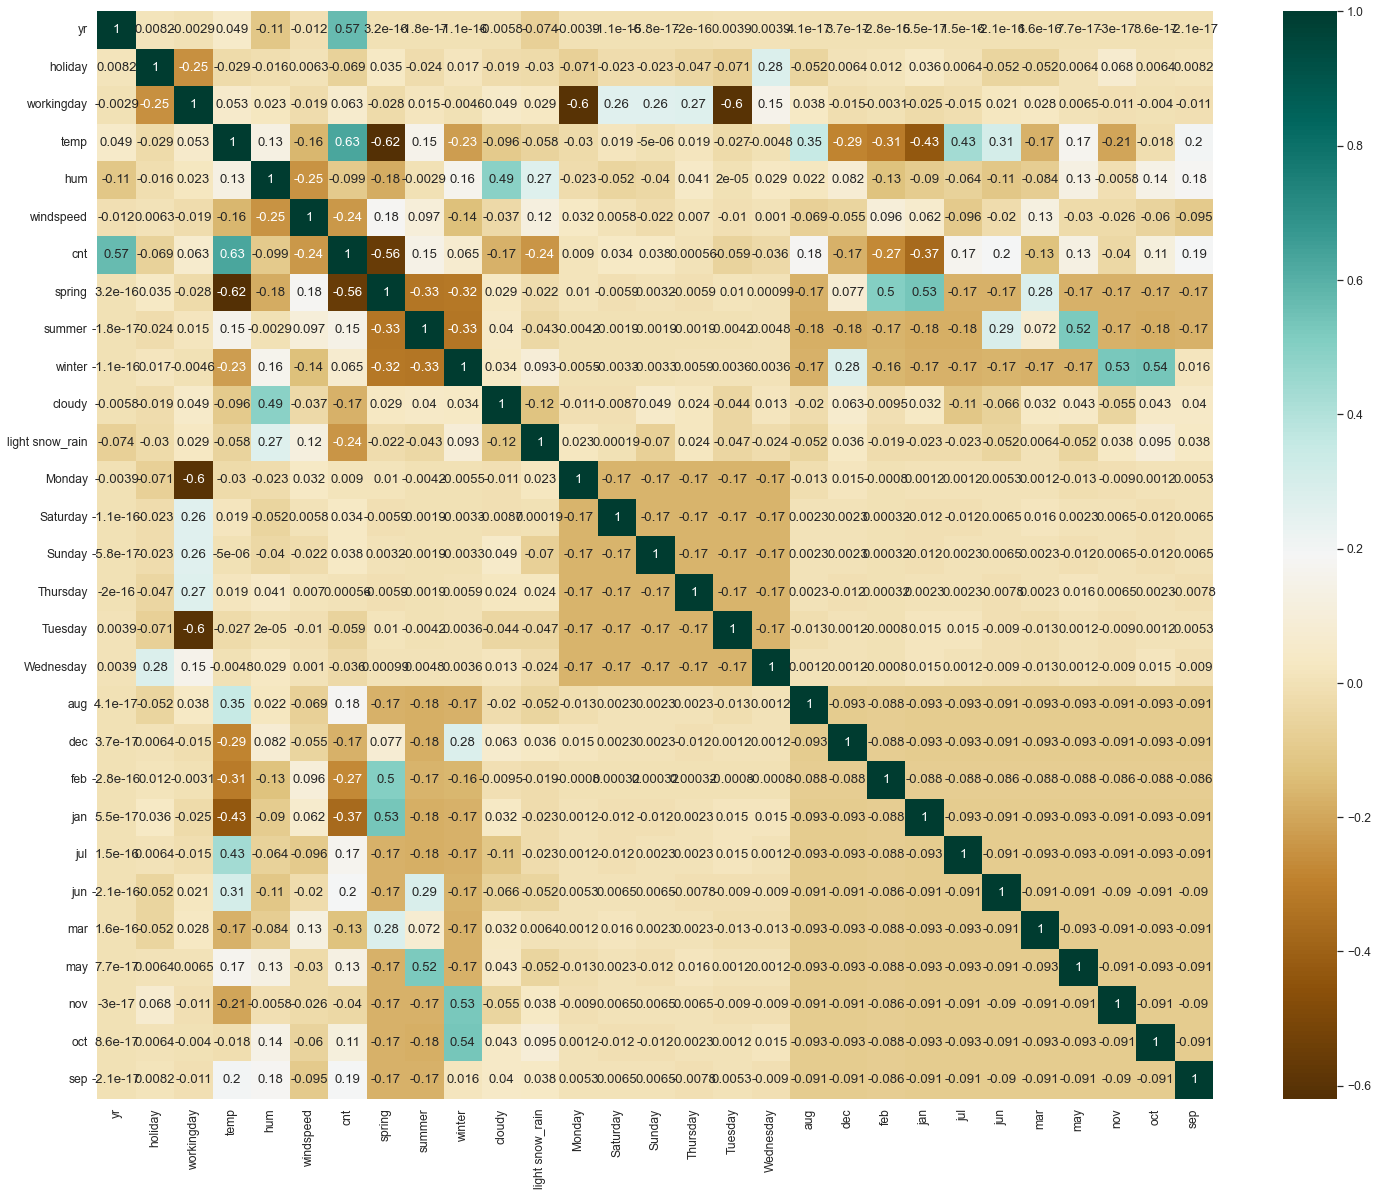

In [16]:
b_correlation = bShare.corr()
plt.figure(figsize = [25,20])
sns.set(font_scale=1.1)
sns.heatmap(b_correlation,annot=True,cmap="BrBG")
plt.show()

#### *** From above, we can see none of the co-relation coefficients are too strong to be dropped to factor in multicolinearity ***

## Step 4: Splitting the Data into Training and Testing Sets

In [17]:
# Split data into train and test
bc_train, bc_test = train_test_split(bShare, train_size = 0.7, test_size = 0.3, random_state = 100)

In [18]:
## Importing library for scaling the numerical variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
##scaling the numerical variables
num_vars = ['temp','windspeed','hum', 'cnt']
bc_train[num_vars] = scaler.fit_transform(bc_train[num_vars])

In [20]:
yc_train = bc_train.pop('cnt')
Xc_train = bc_train

## Step 5: Building a linear model

### Implemented Approach
1. Select 15 features based on RFE selection
2. Check Adjusted R-square and p-value are within range ( Above 60 % and lessthat 0.05 respectively)
3. Check VIF is less than 5
4. If 2 or 3 are violated, drop features and re-iterate

In [21]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm_bc = LinearRegression()
lm_bc.fit(Xc_train, yc_train)

LinearRegression()

In [22]:
##Applying RFE to obtain top 15 features
rfe = RFE(lm_bc, n_features_to_select=15)  
rfe = rfe.fit(Xc_train, yc_train)

In [23]:
list(zip(Xc_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 11),
 ('winter', False, 13),
 ('cloudy', True, 1),
 ('light snow_rain', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 9),
 ('Sunday', False, 12),
 ('Thursday', False, 8),
 ('Tuesday', False, 6),
 ('Wednesday', False, 7),
 ('aug', True, 1),
 ('dec', False, 10),
 ('feb', False, 3),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 2),
 ('mar', False, 14),
 ('may', False, 4),
 ('nov', False, 5),
 ('oct', True, 1),
 ('sep', True, 1)]

In [24]:
##Get first set of list of columns based on RFE ranking
col_list1 = Xc_train.columns[rfe.support_]
col_list1

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'cloudy', 'light snow_rain', 'Monday', 'aug', 'jan', 'jul', 'oct', 'sep'], dtype='object')

In [25]:
import statsmodels.api as sm
def fitOLS(y, X):
    X = sm.add_constant(X)
    # create a fitted model in one line
    lm=sm.OLS(y,X).fit()
    print(lm.summary())
    return lm

In [26]:
## Function for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checkVIF(X) : 
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [27]:
fitOLS(yc_train, Xc_train[col_list1])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     181.1
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.14e-189
Time:                        21:11:18   Log-Likelihood:                 515.84
No. Observations:                 510   AIC:                            -999.7
Df Residuals:                     494   BIC:                            -931.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3411      0.031     

In [28]:
## Dropping workingday due to high p-value
col_list2=col_list1.drop('holiday')
fitOLS(yc_train, Xc_train[col_list2])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     192.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.30e-190
Time:                        21:11:19   Log-Likelihood:                 513.88
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     495   BIC:                            -934.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3321      0.031     

In [30]:
##Above model has high VIF for hum
col_list3=col_list2.drop('aug')
fitOLS(yc_train, Xc_train[col_list3])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.19e-190
Time:                        21:11:42   Log-Likelihood:                 512.65
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     496   BIC:                            -938.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3381      0.031     

In [31]:
##p-value is within range and r value and adjusted r value are good. Check VIF for multicolinearity
checkVIF(Xc_train[col_list3])

           Features    VIF
3               hum  17.26
2              temp  12.88
1        workingday   4.64
4         windspeed   4.09
5            spring   2.41
6            cloudy   2.11
0                yr   2.05
8            Monday   1.81
9               jan   1.65
10              jul   1.42
11              oct   1.23
12              sep   1.22
7   light snow_rain   1.21


In [32]:
col_list4=col_list3.drop('hum')
#checkVIF(Xc_train[col_list4])
fitOLS(yc_train, Xc_train[col_list4])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.22e-189
Time:                        21:11:52   Log-Likelihood:                 506.44
No. Observations:                 510   AIC:                            -986.9
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2583      0.021     

In [33]:
checkVIF(Xc_train[col_list4])

           Features   VIF
2              temp  6.62
1        workingday  4.33
3         windspeed  4.02
4            spring  2.22
0                yr  2.04
7            Monday  1.75
8               jan  1.61
5            cloudy  1.54
9               jul  1.37
11              sep  1.22
10              oct  1.17
6   light snow_rain  1.10


In [34]:
col_list5=col_list4.drop('workingday')
fitOLS(yc_train, Xc_train[col_list5])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.30e-185
Time:                        21:12:03   Log-Likelihood:                 494.11
No. Observations:                 510   AIC:                            -964.2
Df Residuals:                     498   BIC:                            -913.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2978      0.019     

In [ ]:
checkVIF(Xc_train[col_list5])

In [35]:
col_list6=col_list5.drop('Monday')
fitOLS(yc_train, Xc_train[col_list6])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.59e-185
Time:                        21:12:16   Log-Likelihood:                 492.01
No. Observations:                 510   AIC:                            -962.0
Df Residuals:                     499   BIC:                            -915.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3017      0.019     

In [36]:
checkVIF(Xc_train[col_list6])


          Features   VIF
1             temp  4.69
2        windspeed  3.83
3           spring  2.14
0               yr  2.04
6              jan  1.60
4           cloudy  1.50
7              jul  1.35
9              sep  1.22
8              oct  1.17
5  light snow_rain  1.09


In [37]:

col_list7=col_list6.drop('jan')
model= fitOLS(yc_train, Xc_train[col_list7])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     268.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          4.69e-185
Time:                        21:12:29   Log-Likelihood:                 488.00
No. Observations:                 510   AIC:                            -956.0
Df Residuals:                     500   BIC:                            -913.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2909      0.019     

In [38]:
checkVIF(Xc_train[col_list7])

          Features   VIF
1             temp  4.66
2        windspeed  3.83
0               yr  2.03
3           spring  1.54
4           cloudy  1.49
6              jul  1.35
8              sep  1.22
7              oct  1.16
5  light snow_rain  1.09


### The number of variables is down to 9 and p-value is approximately 0 for all features, VIF is less than 5 and we have a good r square and adjusted r sqare

## We will treat this as the final model which boils down to our final Legression Equation:

### cnt =  0.2519 * yr +  0.4260  * temp - 0.1417 * season_spring + 0.0940 * season_winter - 0.0786 * weathersit_cloudy - 0.2574 * weathersit_light snow/rain - 0.0675  * month_dec -0.0886* month_nov + 0.0657 * month_sep +0.1914 ;

## Step 6: Residual Analysis of the train data

In [39]:
Xc_train = sm.add_constant(Xc_train[col_list7])
yc_train_pred = model.predict(Xc_train)



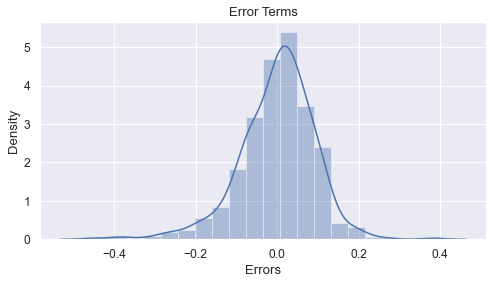

In [40]:
# Plot the histogram of the error terms
plt.figure(figsize = (8,4))
res = yc_train - yc_train_pred
sns.distplot(res, bins =20)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

## Error terms show a normal distribution

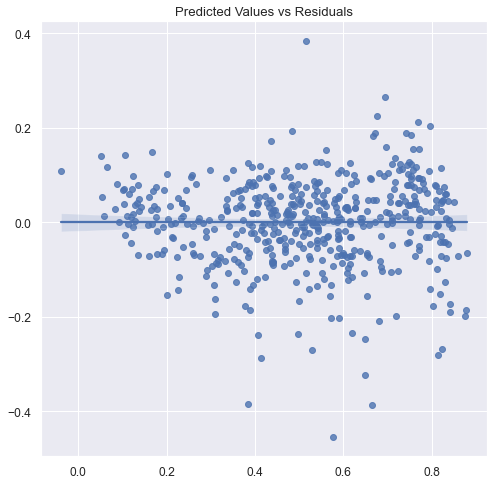

In [41]:
# Residual Variance
plt.figure(figsize = (8,8))

sns.regplot(yc_train_pred,yc_train-yc_train_pred)
plt.title('Predicted Values vs Residuals')
plt.show()

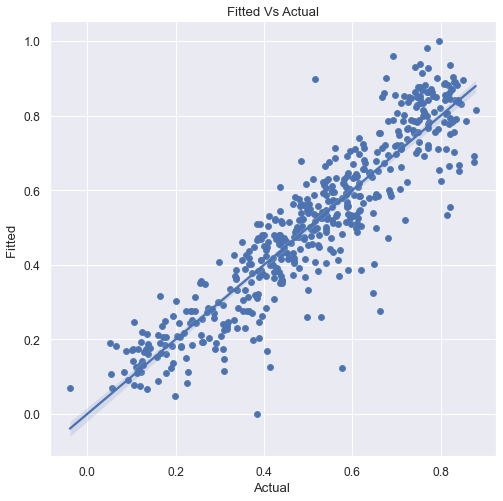

In [42]:
plt.figure(figsize = (8,8))
sns.scatterplot(yc_train_pred,yc_train)
sns.regplot(yc_train_pred,yc_train)
plt.title('Fitted Vs Actual')
plt.xlabel('Actual ')
plt.ylabel('Fitted ')
plt.show()

## Above plot shows error terms are independent of each other

In [43]:
# Mean of Residuals
(yc_train-yc_train_pred).mean()


-1.3259545966650644e-15

### All the criteria related to error terms are satisfied as demonstrated above

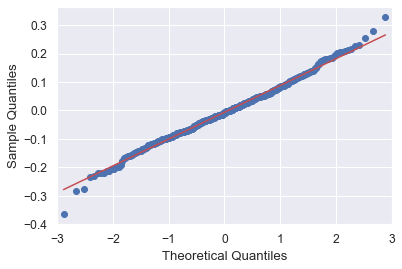

In [44]:
# Verifying the normality of distribution of residuals 
import statsmodels.api as sm
import numpy as np
import pylab

mean = (yc_train-yc_train_pred).mean()
std = (yc_train-yc_train_pred).std()

ref_normal = np.random.normal(mean,std,(yc_train-yc_train_pred).shape[0])
#sm.qqplot(ref_normal, line='r')
sm.qqplot(ref_normal, line='r')
pylab.show()

## Making Predictions

In [45]:
# Now we are scaling the test set
num_vars = ['temp', 'hum', 'windspeed','cnt']
bc_test[num_vars] = scaler.transform(bc_test[num_vars])
bc_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,cloudy,light snow_rain,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
184,0,1,0,0.831783,1.955914,0.056255,0.692706,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,1.808848,0.078579,0.712034,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,2.517430,0.136540,0.303382,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,1.270063,0.138263,0.547400,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.887696,0.201802,0.569029,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [46]:
yc_test = bc_test.pop('cnt')
Xc_test = bc_test

In [47]:
# Creating new dataframe having all the columns from our final model
Xx_test_new = Xc_test[col_list7]

# Adding a constant variable
Xc_test_new = sm.add_constant(Xc_test[col_list7])

# Making predictions

In [48]:
yc_test_pred = model.predict(Xc_test_new)

r2_score(yc_test, yc_test_pred)

0.8075460660066102

In [49]:
r2_score(yc_train, yc_train_pred)

0.828422243178494

In [50]:
print(metrics.mean_absolute_error(yc_test,yc_test_pred))

0.07282533052001894


In [51]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(yc_test,yc_test_pred)))

0.09560729640941293


Text(0, 0.5, 'y_pred')

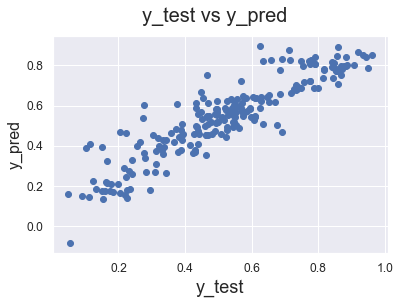

In [52]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(yc_test,yc_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(yc_test, yc_test_pred)
r_squared = r2_score(yc_test, yc_test_pred)

print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.009140755126717342
r_square_value : 0.8075460660066102


Text(0, 0.5, 'Views')

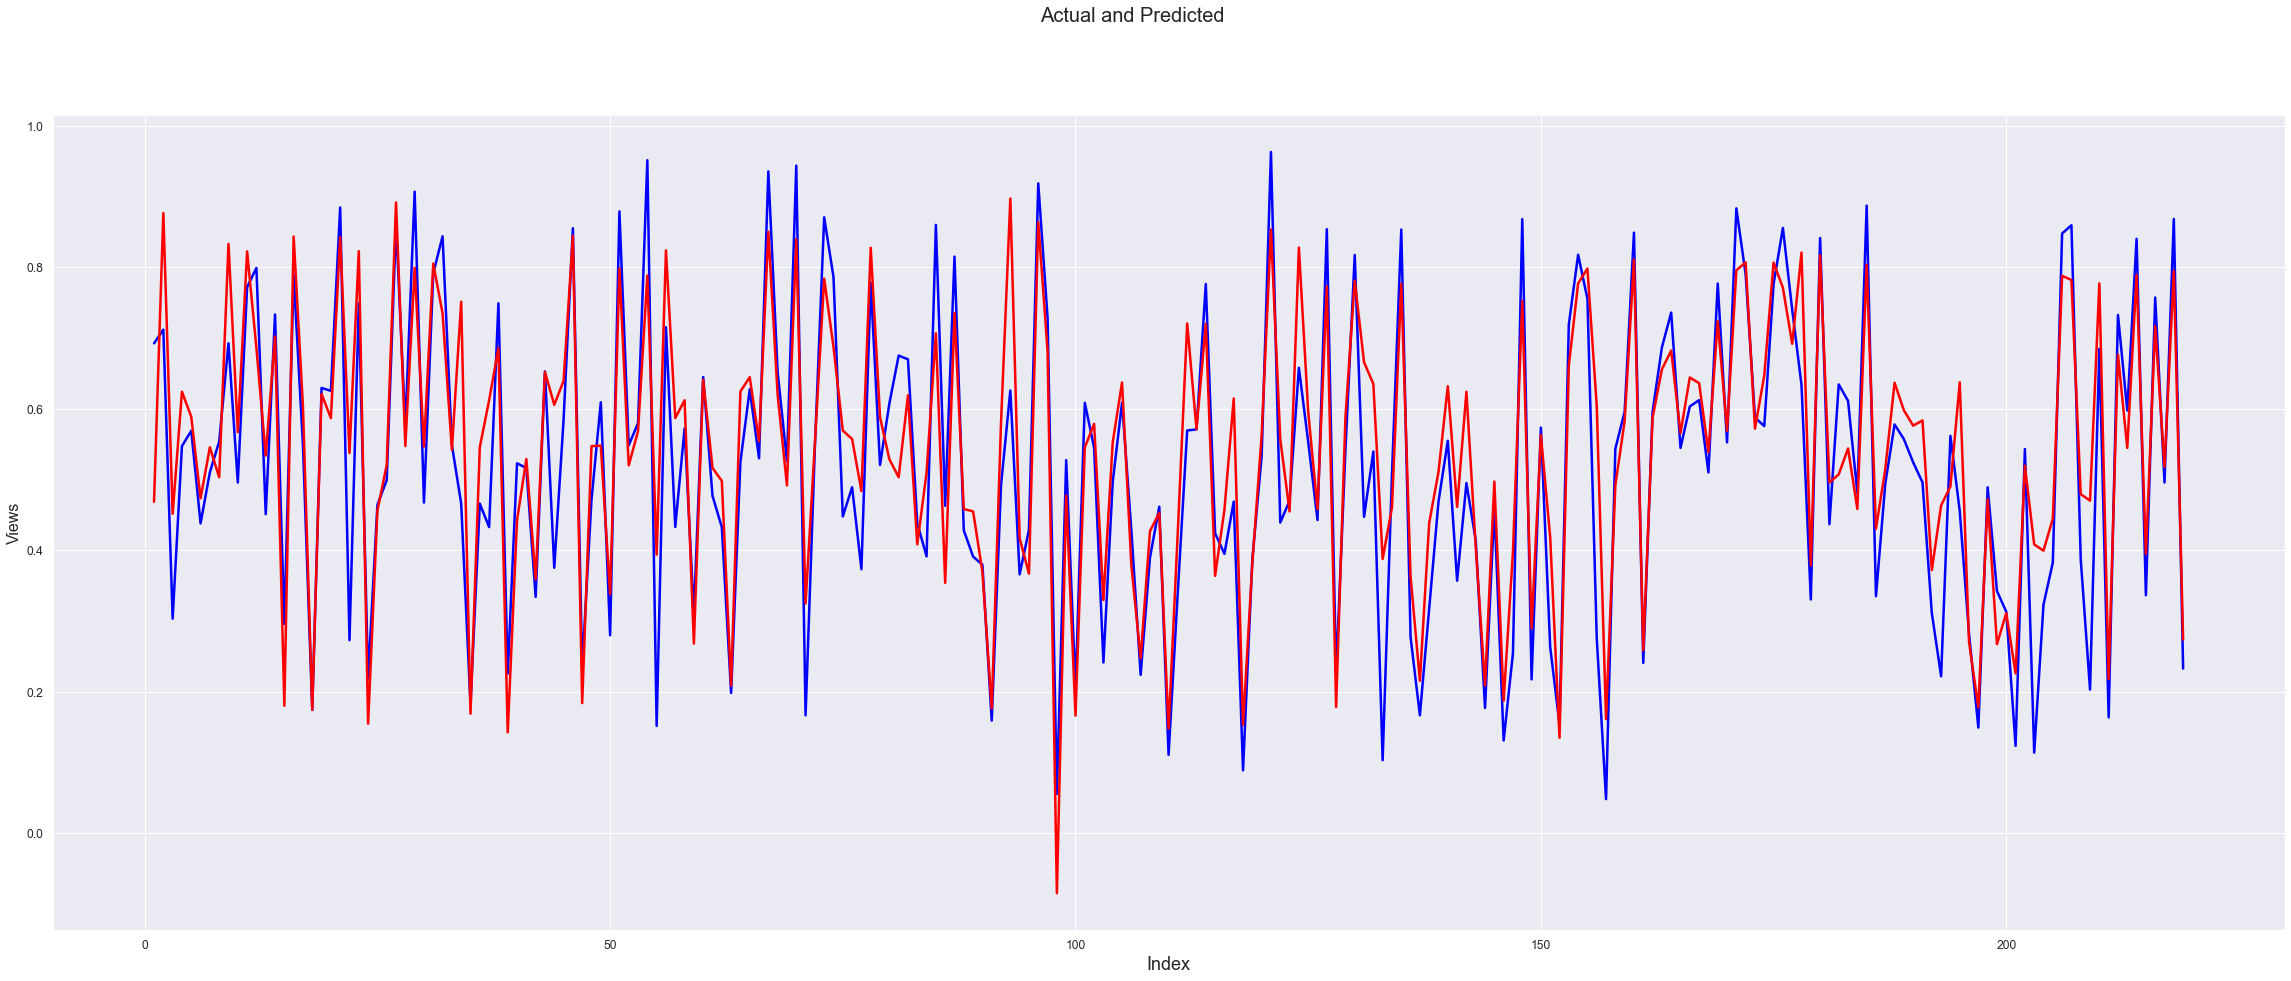

In [54]:
#Actual vs Predicted
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=(40,15))
plt.plot(c,yc_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,yc_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label